In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from PIL import Image
import os

def load_images_and_labels(base_dir, target_size=(64, 64)):
    X = []
    y = []
    categories = {'poisonous': 1, 'edible': 0}
    
    for category, label in categories.items():
        path = os.path.join(base_dir, category)
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            with Image.open(img_path) as img:
                img = img.resize(target_size).convert('L')  # Convert to grayscale
                img_array = np.array(img)
                img_array = img_array.flatten()
                X.append(img_array)
                y.append(label)
    
    return np.array(X), np.array(y)

# Load data
X_train, y_train = load_images_and_labels('dataset/train')
X_test, y_test = load_images_and_labels('dataset/test')


In [11]:

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier()

Accuracy: 0.58


<Axes: >

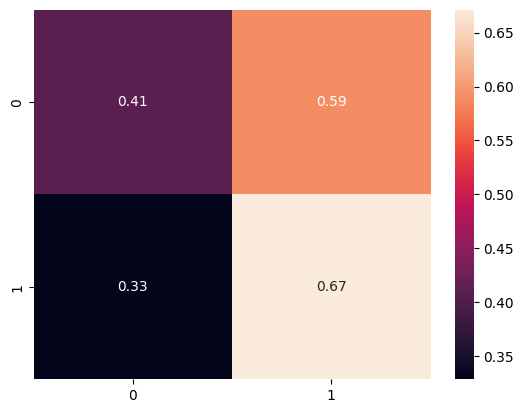

In [12]:

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm_normalized = confusion_matrix(true_labels, predicted_labels, normalize='true')

# Use seaborn to create a heatmap of the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True)

In [13]:
from sklearn.ensemble import RandomForestClassifier


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100)  # 100 trees in the forest

# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier()

In [14]:

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67
